In [1]:
from langgraph.graph import END, Graph, START

graph = Graph()

# 노드 1: 입력 문자열을 변환
def process_input(inputs):
    return {"output": inputs["input"].upper()}

graph.add_node("process", process_input)

graph.add_edge(START, "process")
graph.add_edge("process", END)

app = graph.compile()

# 두 번 실행
print(app.invoke({"input": "hello"}))  # {'output': 'HELLO'}
print(app.invoke({"input": "world"}))  # {'output': 'WORLD'}


{'output': 'HELLO'}
{'output': 'WORLD'}


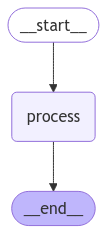

In [2]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [21]:
from langgraph.graph import StateGraph
from typing_extensions import TypedDict

class MyState(TypedDict):
    length: int
    message: str

graph = StateGraph(MyState)

# 노드: 입력을 상태에 저장
def update_memory1(state: MyState):
    if "length" not in state.keys():
        state["length"] = 0
    state["length"] += len(state["message"])
    return state

def update_memory2(state: MyState):
    if "length" not in state.keys():
        state["length"] = 0
    state["length"] += len(state["message"])
    return state

graph.add_node("update_memory1", update_memory1)
graph.add_node("update_memory2", update_memory2)
graph.add_edge(START, "update_memory1")
graph.add_edge("update_memory1", "update_memory2")
graph.add_edge("update_memory2", END)

app = graph.compile()

state = app.invoke({"message": "hello"})
state = app.invoke(state)
print(state)

{'length': 20, 'message': 'hello'}
